# Compute the average probabilities with the optimal configurations (Phase 2b)

In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

from qcd.dampingchannels import OneShotDampingChannel, OneShotEntangledDampingChannel

In [2]:
results2 = OneShotEntangledDampingChannel.build_from_optimal_configurations(file_name='20210405a_C2_A2',
                                                                         path='results/').one_shot_run()

Starting the computation for 210 configurations.
Configuration # 0 of 210, time from start: 1.0 seconds
{'state_probability': 0.6111111111111112, 'angle_rx': 4.537856055185256, 'angle_ry': 2.443460952792061, 'eta_pair': (0.0, 0.07853981633974483)}
Configuration index: 0, Probabilities ->  computed: 0.46, optimized: 0.65 and Delta:  -0.19
Configuration # 30 of 210, time from start: 17.0 seconds
{'state_probability': 0.05557249064336401, 'angle_rx': 6.166830023715769, 'angle_ry': 6.166830023780038, 'eta_pair': (0.07853981633974483, 0.9424777960769379)}
Configuration index: 30, Probabilities ->  computed: 0.38, optimized: 0.92 and Delta:  -0.54
Configuration # 60 of 210, time from start: 34.0 seconds
{'state_probability': 0.09259259259259262, 'angle_rx': 2.9088834003151773, 'angle_ry': 2.6761715197246385, 'eta_pair': (0.23561944901923448, 0.5497787143782138)}
Configuration index: 60, Probabilities ->  computed: 0.56, optimized: 0.72 and Delta:  -0.16
Configuration # 90 of 210, time from s

TypeError: Can't instantiate abstract class ChannelConfiguration with abstract methods to_dict

In [ ]:
results = OneShotEntangledDampingChannel.build_from_optimal_configurations(file_name='20210405a_C2_A1',
                                                                         path='results/').one_shot_run()

In [2]:
results3 = OneShotDampingChannel.build_from_optimal_configurations(file_name='20210404_ADAM',
                                                                         path='results/').one_shot_run()

Starting the computation for 210 configurations.
Configuration # 0 of 210, time from start: 1.0 seconds
{'state_probability': 0.0, 'angle_rx': 0, 'angle_ry': 0, 'eta_pair': (0.07853981633974483, 0.0)}
Configuration index: 0, Probabilities ->  computed: 0.53, optimized: 0 and Delta:  0.53
Configuration # 30 of 210, time from start: 15.0 seconds
{'state_probability': 0.0, 'angle_rx': 0, 'angle_ry': 0, 'eta_pair': (0.9424777960769379, 0.07853981633974483)}
Configuration index: 30, Probabilities ->  computed: 0.51, optimized: 0 and Delta:  0.51
Configuration # 60 of 210, time from start: 31.0 seconds
{'state_probability': 0.0, 'angle_rx': 0, 'angle_ry': 0, 'eta_pair': (0.5497787143782138, 0.23561944901923448)}
Configuration index: 60, Probabilities ->  computed: 0.59, optimized: 0 and Delta:  0.59
Configuration # 90 of 210, time from start: 46.0 seconds
{'state_probability': 0.0, 'angle_rx': 0, 'angle_ry': 0, 'eta_pair': (0.47123889803846897, 0.39269908169872414)}
Configuration index: 90, 

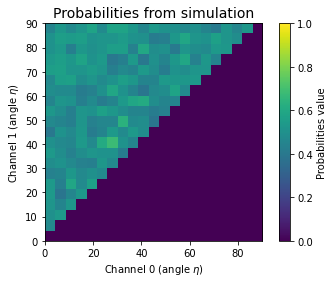

In [3]:
results3.plot_probabilities()

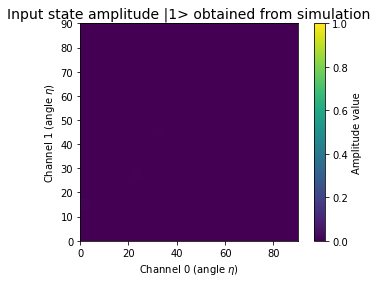

In [5]:
results3.plot_amplitudes()

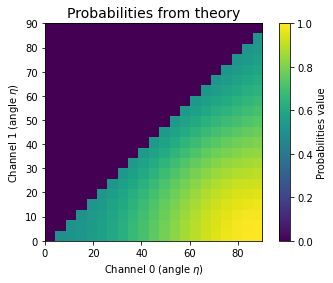

In [5]:
results.plot_theoretical_probabilities(strategy='one_shot_side_entanglement')

In [5]:
results._optimization_results[0].probabilities_matrix

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.48],
       [0.  , 0.  , 0.  , 0.  , 0.51, 0.54],
       [0.  , 0.  , 0.  , 0.45, 0.57, 0.51],
       [0.  , 0.  , 0.53, 0.56, 0.48, 0.53],
       [0.  , 0.46, 0.58, 0.51, 0.59, 0.52]])

In [7]:
results._optimization_results[0]

In [6]:
results2 = OneShotEntangledDampingChannel.build_from_optimal_configurations(file_name='20210320_results_CRS',
                                                                         path='results/').one_shot_run()

Starting the computation for 210 configurations.
Configuration # 0 of 210, time from start: 1.0 seconds
{'state_probability': 0.9709041541696319, 'angle_rx': 0.22334571933209713, 'angle_ry': 5.540258469689979, 'eta_pair': (0.0, 0.06981317007977318)}
Configuration index: 0, Probabilities ->  computed: 0.48, optimized: 0.66 and Delta:  -0.18
Configuration # 30 of 210, time from start: 17.0 seconds
{'state_probability': 0.9878430456358716, 'angle_rx': 0.7302694759771587, 'angle_ry': 0.0, 'eta_pair': (0.06981317007977318, 0.9424777960769379)}
Configuration index: 30, Probabilities ->  computed: 0.52, optimized: 0.93 and Delta:  -0.41
Configuration # 60 of 210, time from start: 33.0 seconds
{'state_probability': 0.8937576278137387, 'angle_rx': 0.4938410367581495, 'angle_ry': 2.677146050590393, 'eta_pair': (0.22689280275926285, 0.5410520681182421)}
Configuration index: 60, Probabilities ->  computed: 0.41, optimized: 0.74 and Delta:  -0.33
Configuration # 90 of 210, time from start: 50.0 sec

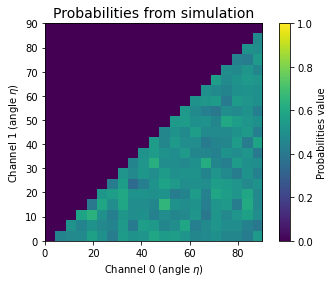

In [7]:
results2.plot_probabilities()

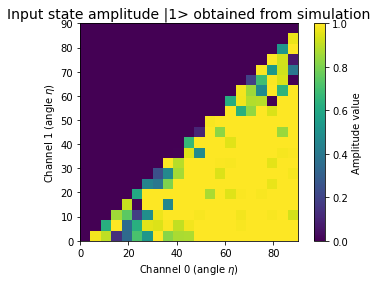

In [8]:
results2.plot_amplitudes()

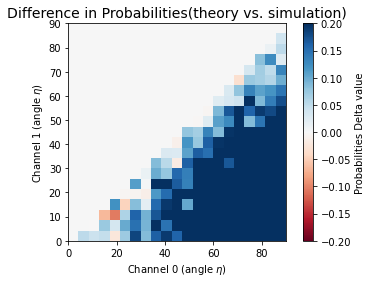

In [9]:
results2.plot_probabilities_comparison_with_theoretical_result(results_index=0,
                                                              strategy='one_shot_side_entanglement',
                                                              vmin= -0.2,
                                                              vmax= 0.2)

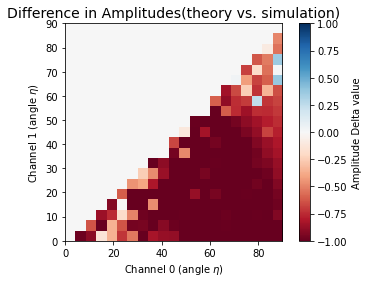

In [11]:
results2.plot_amplitudes_comparison_with_theoretical_result(results_index=0,
                                                            strategy='one_shot_side_entanglement',
                                                            vmin = -1,
                                                            vmax = 1)

In [12]:
results3 = OneShotEntangledDampingChannel.build_from_optimal_configurations(file_name='20210403_ESCH_100iterations_20etas',
                                                                         path='results/').one_shot_run()

Starting the computation for 210 configurations.
Configuration # 0 of 210, time from start: 1.0 seconds
{'state_probability': 0.03144080116050439, 'angle_rx': 0.17666541815306608, 'angle_ry': 3.397331520105698, 'eta_pair': (0.2255134058981312, 0.0)}
Configuration index: 0, Probabilities ->  computed: 0.47, optimized: 0.7 and Delta:  -0.23
Configuration # 30 of 210, time from start: 17.0 seconds
{'state_probability': 0.7307108167148392, 'angle_rx': 0.1683967071837485, 'angle_ry': 0.060376539742819486, 'eta_pair': (0.8860771237926137, 0.2255134058981312)}
Configuration index: 30, Probabilities ->  computed: 0.52, optimized: 0.8 and Delta:  -0.28
Configuration # 60 of 210, time from start: 34.0 seconds
{'state_probability': 0.99998292128122, 'angle_rx': 0.1388201186173367, 'angle_ry': 1.294765128522075, 'eta_pair': (0.6330518363897495, 0.3976994150920718)}
Configuration index: 60, Probabilities ->  computed: 0.52, optimized: 0.66 and Delta:  -0.14
Configuration # 90 of 210, time from star

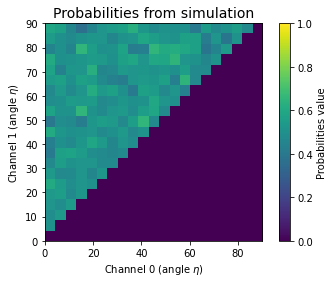

In [14]:
results3.plot_probabilities()

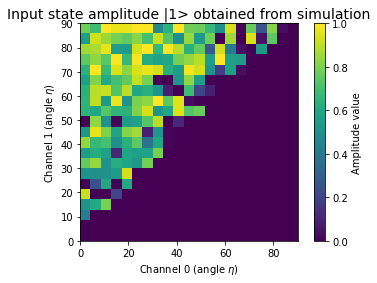

In [15]:
results3.plot_amplitudes()

In [16]:
results4 = OneShotEntangledDampingChannel.build_from_optimal_configurations(file_name='20210321_results_CRS',
                                                                         path='results/').one_shot_run()

Starting the computation for 210 configurations.
Configuration # 0 of 210, time from start: 1.0 seconds
{'state_probability': 0.74947926654579, 'angle_rx': 2.4409836375179474, 'angle_ry': 1.0088402961708793, 'eta_pair': (0.0, 0.06981317007977318)}
Configuration index: 0, Probabilities ->  computed: 0.57, optimized: 0.71 and Delta:  -0.14
Configuration # 30 of 210, time from start: 20.0 seconds
{'state_probability': 0.9986439715477226, 'angle_rx': 2.537773227362539, 'angle_ry': 3.086082629626999, 'eta_pair': (0.06981317007977318, 0.9424777960769379)}
Configuration index: 30, Probabilities ->  computed: 0.52, optimized: 0.91 and Delta:  -0.39
Configuration # 60 of 210, time from start: 39.0 seconds
{'state_probability': 0.8213938048432694, 'angle_rx': 1.0471975511965979, 'angle_ry': 3.37430322052237, 'eta_pair': (0.22689280275926285, 0.5410520681182421)}
Configuration index: 60, Probabilities ->  computed: 0.56, optimized: 0.72 and Delta:  -0.16
Configuration # 90 of 210, time from start

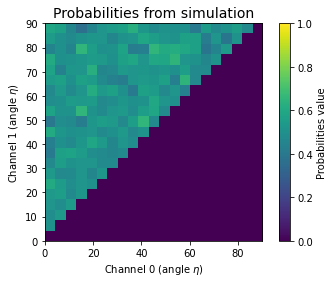

In [17]:
results3.plot_probabilities()

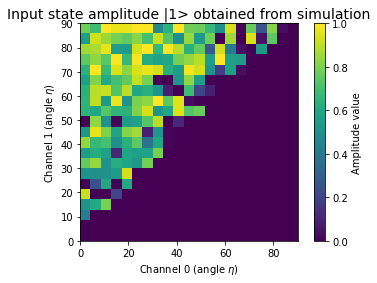

In [18]:
results3.plot_amplitudes()